<div class="alert alert-block alert-success">
This jupyter notebook is part of the supplementary material for the book "Materials Data Science" (Stefan Sandfeld, Springer, 2024, DOI 10.1007/978-3-031-46565-9). For further details please refer to the accompanying webpage at <a href="https://mds-book.org">https://mds-book.org</a>.
</div>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

from utilities import pmfplot

## 10.5 Geometric Distribution

### Plot the discrete distribution 

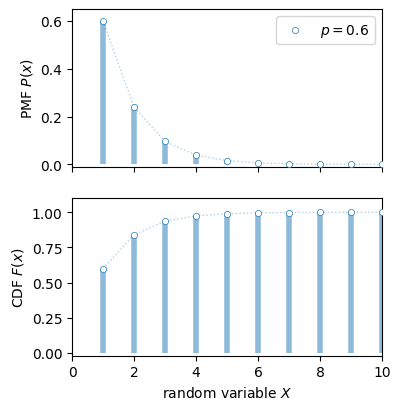

In [22]:
xlim = (0, 10)
ylim = (-0.01, 0.65)
p = 0.6
x = np.arange(1, 13)
rv = stats.geom(p)

fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(4, 4.5))
pmfplot(ax[0], x, rv.pmf(x), label=r'$p={}$'.format(p))
pmfplot(ax[1], x, rv.cdf(x))
ax[0].plot(x, rv.pmf(x), lw=1, ls=':', alpha=0.35)
ax[1].plot(x, rv.cdf(x), lw=1, ls=':', alpha=0.35)
ax[0].legend()
ax[0].set(xlabel=r"", ylabel=r"PMF $P(x)$",     ylim=ylim, xlim=xlim)
ax[1].set(xlabel=r"random variable $X$", ylabel=r"CDF $F(x)$",  ylim=[-0.02, 1.1]);

### Draw Samples from the Distribution

In [36]:
rng = np.random.default_rng()

n_samples = 50
p = 0.6
sample = rng.geometric(p, n_samples)
sample

array([ 1,  1,  4,  2,  2,  2,  3,  3,  1,  1,  3,  2,  1,  2,  1,  3,  2,
        1,  1,  1,  3,  3,  1,  2,  2,  4,  1,  3,  1, 11,  1,  2,  1,  2,
        4,  2,  1,  1,  2,  1,  1,  3,  1,  1,  1,  2,  1,  1,  2,  1])

In [49]:
# Count the number of events
x = np.arange(0, sample.max() + 1)
counts = np.zeros_like(x, dtype=int)
for idx in sample:
    counts[idx] += 1

# remove entries for x=0
x = x[1:]
counts = counts[1:]

# compute pdf and cdf
pmf = counts / counts.sum()
cdf = pmf.cumsum()

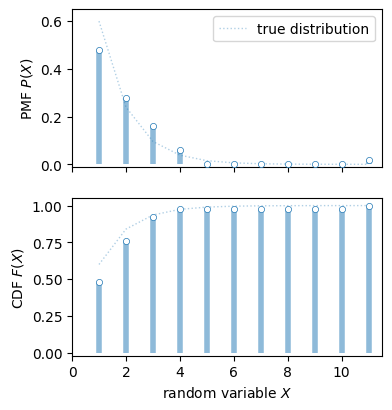

In [51]:
fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(4, 4.5))
pmfplot(ax[0], x, pmf)
pmfplot(ax[1], x, cdf)
ax[0].set(xlabel=r"", ylabel=r"PMF $P(X)$", ylim=ylim, xlim=(0, x.max() + 0.5))
ax[1].set(xlabel=r"random variable $X$", ylabel=r"CDF $F(X)$", ylim=[-0.02, 1.05])    
ax[0].plot(x, rv.pmf(x), lw=1, ls=':', alpha=0.35, label='true distribution')
ax[1].plot(x, rv.cdf(x), lw=1, ls=':', alpha=0.35)
ax[0].legend()